# Machine Learning and Statistics Project

In [58]:
from IPython.display import Image, display
image_url = 'https://miro.medium.com/v2/resize:fit:1400/1*7bnLKsChXq94QjtAiRn40w.png'
display(Image(url=image_url))

### Introduction:<br>

The Iris dataset is a well-known dataset in the field of machine learning and statistics. It was introduced by the British biologist and statistician Ronald A. Fisher in 1936. The dataset consists of measurements of sepal length, sepal width, petal length, and petal width for 150 iris flowers, representing three different species: setosa, versicolor, and virginica. Each species has 50 samples, making it a balanced dataset.<br>

### Assumptions:<br>

I have imported the dataset using it from a preloaded dataset in the sklearn library: "from sklearn.datasets import load_iris". For the basis of this project, it is assumed that this dataset has not been amended or changed in anyway from the original.<br>

### Step 1: Import required libraries and dataset<br>

In [40]:
# Import various libraries:

import pandas as pd # importing pandas as I'm likely going to be using this
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
import pickle
from collections import defaultdict
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
# NumPy for numerical operations
import numpy as np
# Matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

In [42]:
# load dataset from sklearn library and look for a description as a brief test.[01]
# Converting dataset into a pandas DataFrame for data analysis, this may not be required but may come in useful at a later date.

iris = load_iris()

# Create separate variables for features (X) and target (y)
X = iris.data
y = iris.target

# Create a DataFrame for further analysis if needed
data = pd.DataFrame(data=X, columns=iris.feature_names)
data['target'] = y

print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [43]:
# I want to have a quick look and see the size of the data I am dealing with
data.shape

(150, 5)

### Step 2: Explore and understand the data and data remediation

In [44]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [45]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
# Continuing to review the file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [47]:
# Check for missing values (if any)
missing_values = data.isnull().sum()

### Step 2:

In [48]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Create a Logistic Regression model
model = LogisticRegression()

In [50]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [52]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [53]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Nearest Neighbors<br>

sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.<br>

https://scikit-learn.org/stable/modules/neighbors.html

In [54]:
# Using Sklearn nearest neighbors:

model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
pickle.dump(model1, open('model1.pkl','wb'))

#model1 = pickle.load(open('model1.pkl','rb'))

In [55]:
predictions=model1.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Random Forest Classifier:<br>

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.<br>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [56]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Print the accuracy on the test data
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 1.00


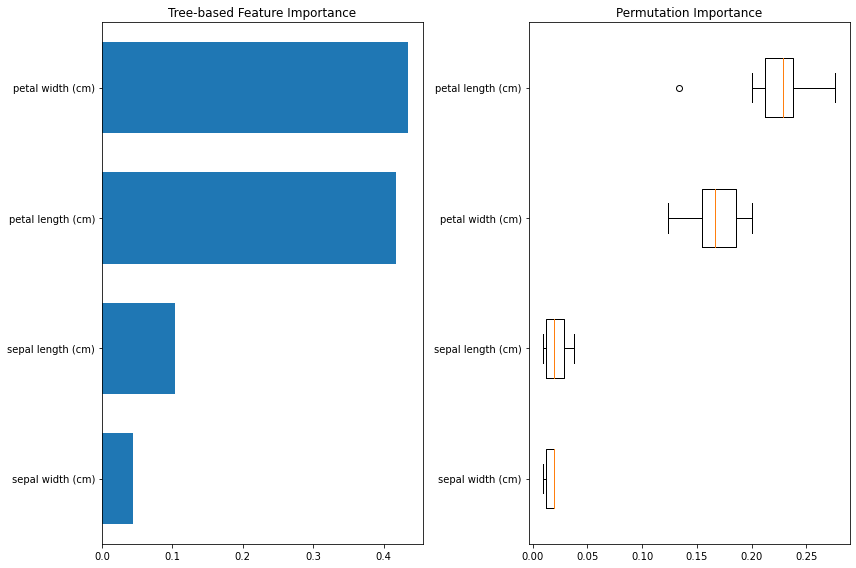

In [57]:
# Feature Importance using Permutation Importance
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Plotting
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot the tree-based feature importance
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.columns[:-1][tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax1.set_title('Tree-based Feature Importance')

# Plot the permutation-based feature importance
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=data.columns[:-1][perm_sorted_idx],
)
ax2.set_title('Permutation Importance')

fig.tight_layout()
plt.show()

### References:

[01] Scikit-learn (2023) Machine Learning in Python. Available at: https://scikit-learn.org/stable/index.html Accessed 31/10/2023<br>
[02] Scikit-learn (2023) sklearn.datasets.load_iris. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris Accessed 31/10/2023<br>
[03] pandas (2023) pandas. Available at: https://pandas.pydata.org/ Accessed 31/10/2023<br>
[04] Scikit-learn (2023) 1.1. Linear Models. Available at: https://scikit-learn.org/stable/modules/linear_model.html Accessed 26/11/2023.<br>
[05] Scikit-learn (2023) sklearn.linear_model.LinearRegression. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. Accessed 26/11/2023.<br>
[06] activestate (2021) How To Run Linear Regressions In Python Scikit-learn. Available at: https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/<br>